# Debug Data Grid Files

- Goal check if files are filled correctly

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS
- creation date : 2024/08/27
- last update : 2024/08/27


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os,sys
import pickle
# to enlarge the sizes
params = {'legend.fontsize': 'large',
          'figure.figsize': (12, 6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Imports

In [3]:
import getObsAtmo as obs

In [4]:
OBS_tag = 'LSST'

In [5]:
obs.__path__

['/Users/dagoret/anaconda3/envs/conda_py310/lib/python3.10/site-packages/getObsAtmo']

In [6]:
from getObsAtmo.getObsAtmo import ObsAtmo,Dict_Of_sitesPressures,getObsSiteDataFrame,_getPackageDir

In [7]:

__all__ = ['Dict_Of_sitesAltitudes',
           'Dict_Of_sitesPressures',
           'Dict_Of_sitesAliases',
           'file_data_dict',
           '_getPackageDir',
           'get_obssite_keys',
           'sanitizeString',
           'validateObsName', 
           'is_obssite', 
           'ObsAtmo','ObsAtmoPressure','ObsAtmoGrid']


# preselected sites
Dict_Of_sitesAltitudes = {'LSST': 2.663,
                          'CTIO': 2.207,
                          'OHP': 0.65,
                          'PDM': 2.8905,
                          'OMK': 4.205,
                          'OSL': 0.000,
                          }
# pressure calculated by libradtran
Dict_Of_sitesPressures = {'LSST': 731.50433,
                          'CTIO': 774.6052,
                          'OHP': 937.22595,
                          'PDM': 710.90637,
                          'OMK': 600.17224,
                          'OSL': 1013.000,
                          }

Dict_Of_sitesAliases = {'LSST': ['Rubin','Rubin Observatory','Auxtel'],
                        'CTIO': ["Cerro Tololo"],
                        'OHP': ["Observatoire de Haute Provence"],
                        'PDM': ["Pic du Midi","Observatoire du Pic du Midi"],
                        'OMK': ["Mauna Kea","Mauna Kea Observatory"],
                        'OSL': ["Sea Level","Sea Level Observatory"]
                        }

file_data_dict = {
    "info": "atmospherictransparencygrid_params.pickle",
    "data_rayleigh": "atmospherictransparencygrid_rayleigh.npy",
    "data_o2abs": "atmospherictransparencygrid_O2abs.npy",
    "data_pwvabs": "atmospherictransparencygrid_PWVabs.npy",
    "data_ozabs": "atmospherictransparencygrid_OZabs.npy",
}

In [8]:
# construct the path of input data file
path = os.path.join(_getPackageDir(), '../obsatmo_data')
info_params = {}

# load all data files (training and test)
filename = os.path.join(path, OBS_tag + "_" + file_data_dict["info"])
with open(filename, 'rb') as f:
    info_params = pickle.load(f)

data_rayleigh = np.load(os.path.join(path, OBS_tag + "_" + file_data_dict["data_rayleigh"]))
data_O2abs = np.load(os.path.join(path, OBS_tag + "_" + file_data_dict["data_o2abs"]))
data_PWVabs = np.load(os.path.join(path, OBS_tag + "_" + file_data_dict["data_pwvabs"]))
data_OZabs = np.load(os.path.join(path, OBS_tag + "_" + file_data_dict["data_ozabs"]))

In [9]:
# setup training dataset (those used for interpolation)
WLMIN = info_params["WLMIN"]
WLMAX = info_params["WLMAX"]
WLBIN = info_params["WLBIN"]
NWLBIN = info_params['NWLBIN']
WL     = info_params['WL']
OBS = info_params['OBS']

AIRMASSMIN = info_params['AIRMASSMIN']
AIRMASSMAX = info_params['AIRMASSMAX']
NAIRMASS = info_params['NAIRMASS']
DAIRMASS = info_params['DAIRMASS']
AIRMASS = info_params['AIRMASS']

PWVMIN = info_params['PWVMIN']
PWVMAX = info_params['PWVMAX']
NPWV = info_params['NPWV']
DPWV = info_params['DPWV']
PWV = info_params['PWV']

OZMIN = info_params['OZMIN']
OZMAX = info_params['OZMAX']
NOZ = info_params['NOZ']
DOZ = info_params['DOZ']
OZ = info_params['OZ']


In [10]:
data_PWVabs.shape

(800, 34, 62)

In [11]:
data_PWVabs.min()

0.1424384142438414

# Check information

In [12]:
Dict_Of_sitesPressures

{'LSST': 731.50433,
 'CTIO': 774.6052,
 'OHP': 937.22595,
 'PDM': 710.90637,
 'OMK': 600.17224,
 'OSL': 1013.0}

### Choose Rubin-LSST observation sites but other sites may be chosen

In [13]:
obs_str = 'LSST'
std_pressure = Dict_Of_sitesPressures[obs_str]
new_pressure = Dict_Of_sitesPressures[obs_str]*1.1
print(new_pressure)

label1 = f"P = {std_pressure:.0f} hPa"
label2 = f"P = {new_pressure:.0f} hPa"

804.654763


In [14]:
emul1 =  ObsAtmo(obs_str=obs_str)
emul2 =  ObsAtmo(obs_str=obs_str,pressure = new_pressure)

LSST site name validated as LSST observatory
LSST site name validated as LSST observatory


# Typical transmission plot

- show a typical transmission plot

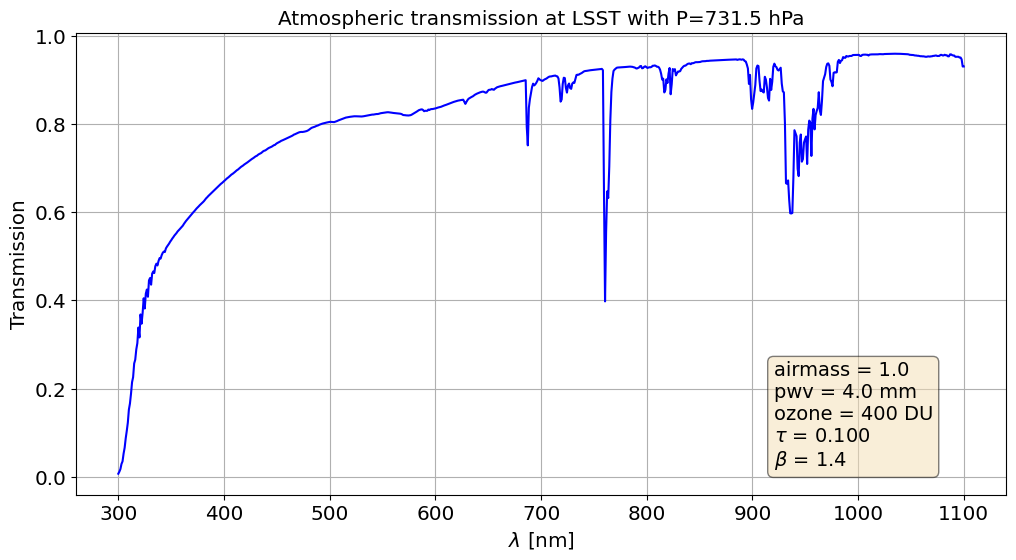

In [15]:
emul1.plot_transmission()

# Setting atmospheric parameters

In [16]:
WL = emul1.GetWL()
airmasses = emul1.AIRMASS
NAM = len(airmasses)
pwvs = emul1.PWV
NPWV = len(pwvs)
ozs = emul1.OZ
NOZ = len(ozs)

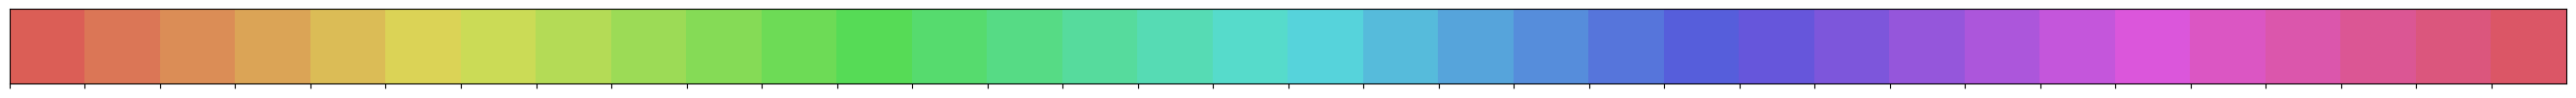

In [17]:
hls_colors = sns.color_palette("hls", NAM)
sns.palplot(hls_colors)

## Check emulator with Rayleigh scattering

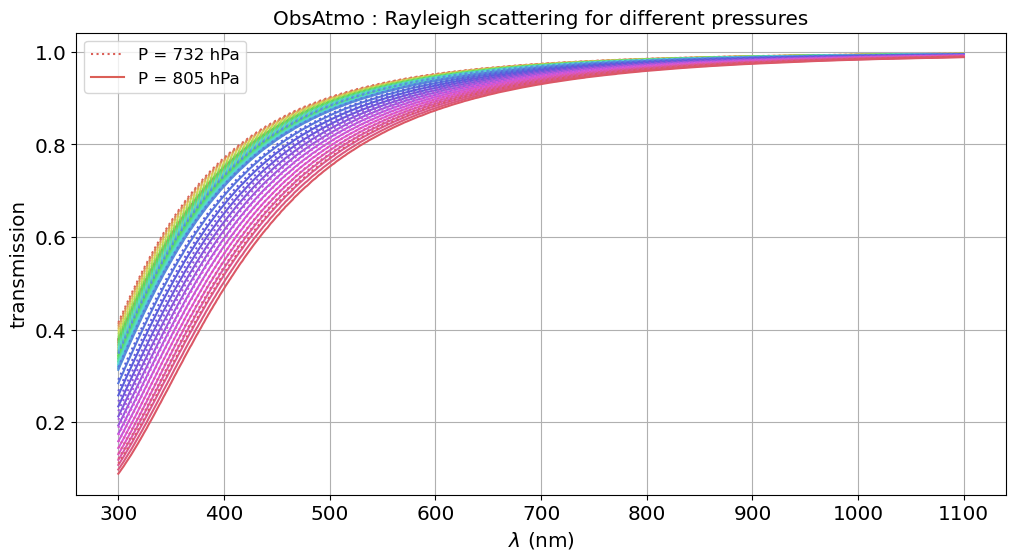

In [18]:
fig, ax = plt.subplots()
for idx,am in enumerate(airmasses):

    transm1 = emul1.GetRayleighTransparencyArray(WL,am)
    transm2 = emul2.GetRayleighTransparencyArray(WL,am)
    
    if idx == 0:
        ax.plot(WL,transm1,":",color=hls_colors[idx],label=label1)
        ax.plot(WL,transm2,"-",color=hls_colors[idx],label=label2)
    else:
        ax.plot(WL,transm1,":",color=hls_colors[idx])
        ax.plot(WL,transm2,"-",color=hls_colors[idx])
    
title = f"ObsAtmo : Rayleigh scattering for different pressures"
ax.set_title(title)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("transmission")
# place a text box in upper left in axes coords
#ax.text(0.5, 0.05, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)
ax.grid()
ax.legend()
plt.show()

## Check emulator with Oxygen O2 absorption

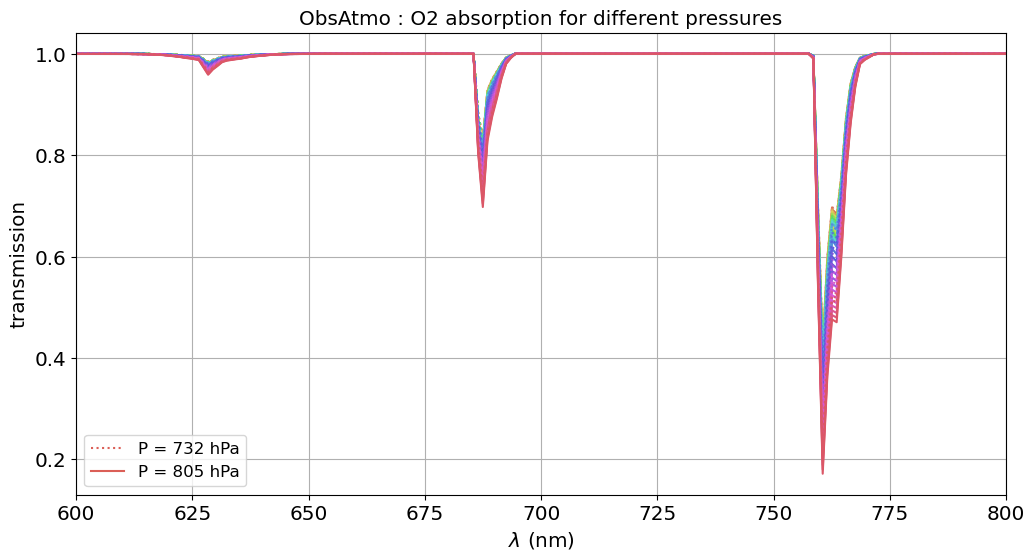

In [19]:
fig, ax = plt.subplots()
for idx,am in enumerate(airmasses):

    transm1 = emul1.GetO2absTransparencyArray(WL,am)
    transm2 = emul2.GetO2absTransparencyArray(WL,am)
    
    if idx == 0:
        ax.plot(WL,transm1,":",color=hls_colors[idx],label=label1)
        ax.plot(WL,transm2,"-",color=hls_colors[idx],label=label2)
    else:
        ax.plot(WL,transm1,":",color=hls_colors[idx])
        ax.plot(WL,transm2,"-",color=hls_colors[idx])
        

title = f"ObsAtmo : O2 absorption for different pressures"
ax.set_title(title)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("transmission")
ax.set_xlim(600.,800.)
# place a text box in upper left in axes coords
#ax.text(0.5, 0.05, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)
ax.grid()
ax.legend()
plt.show()

### Zoom at the O2 abs line at 760 nm

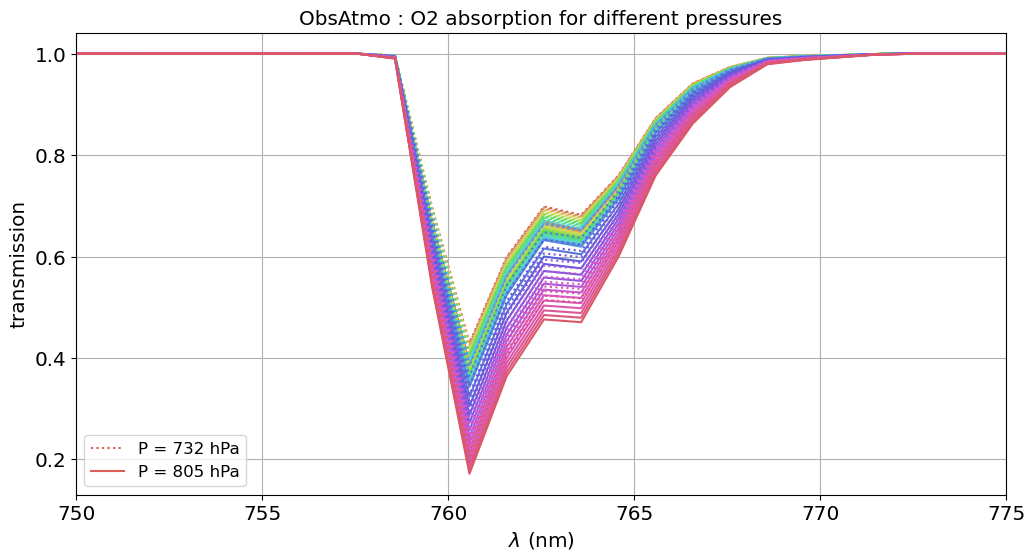

In [20]:
fig, ax = plt.subplots()
for idx,am in enumerate(airmasses):

    transm1 = emul1.GetO2absTransparencyArray(WL,am)
    transm2 = emul2.GetO2absTransparencyArray(WL,am)
    
    if idx == 0:
        ax.plot(WL,transm1,":",color=hls_colors[idx],label=label1)
        ax.plot(WL,transm2,"-",color=hls_colors[idx],label=label2)
    else:
        ax.plot(WL,transm1,":",color=hls_colors[idx])
        ax.plot(WL,transm2,"-",color=hls_colors[idx])
        

title = f"ObsAtmo : O2 absorption for different pressures"
ax.set_title(title)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("transmission")
ax.set_xlim(750.,775.)
# place a text box in upper left in axes coords
#ax.text(0.5, 0.05, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)
ax.grid()
ax.legend()
plt.show()

## Check emulator with PWV absorption

Expect no difference

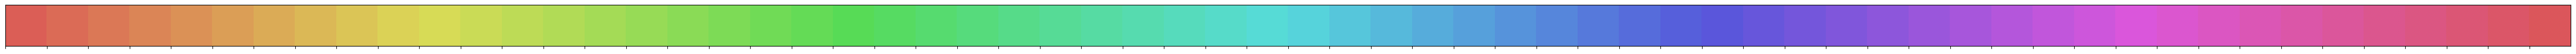

In [21]:
hls_colors = sns.color_palette("hls", NPWV)
sns.palplot(hls_colors)

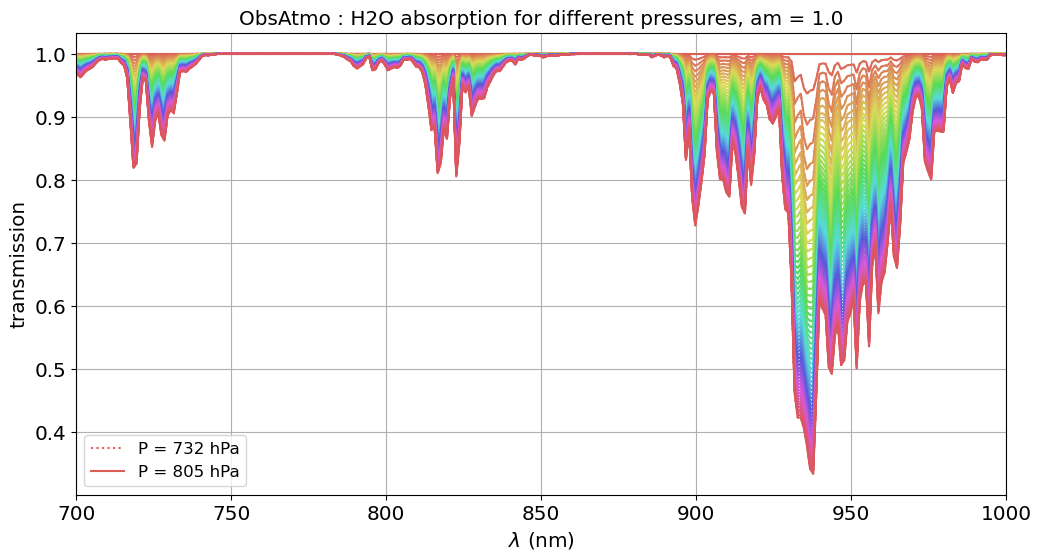

In [22]:
am =1

fig, ax = plt.subplots()
for idx,pwv in enumerate(pwvs):

    transm1 = emul1.GetPWVabsTransparencyArray(WL,am,pwv)
    transm2 = emul2.GetPWVabsTransparencyArray(WL,am,pwv)
    
    if idx == 0:
        ax.plot(WL,transm1,":",color=hls_colors[idx],label=label1)
        ax.plot(WL,transm2,"-",color=hls_colors[idx],label=label2)
    else:
        ax.plot(WL,transm1,":",color=hls_colors[idx])
        ax.plot(WL,transm2,"-",color=hls_colors[idx])
        

title = f"ObsAtmo : H2O absorption for different pressures, am = {am:.1f}"
ax.set_title(title)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("transmission")
ax.set_xlim(700.,1000.)
# place a text box in upper left in axes coords
#ax.text(0.5, 0.05, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)
ax.grid()
ax.legend()
plt.show()

## Check emulator with Ozone absorption

- expect no difference

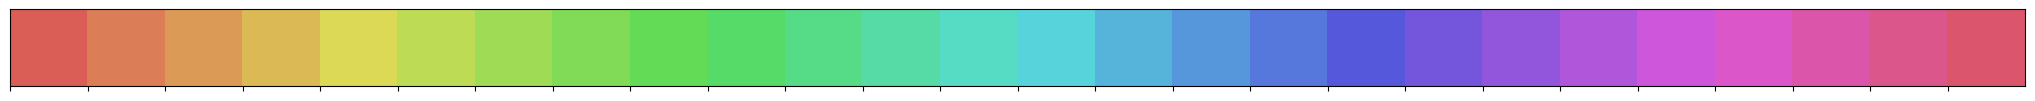

In [23]:
hls_colors = sns.color_palette("hls", NOZ)
sns.palplot(hls_colors)

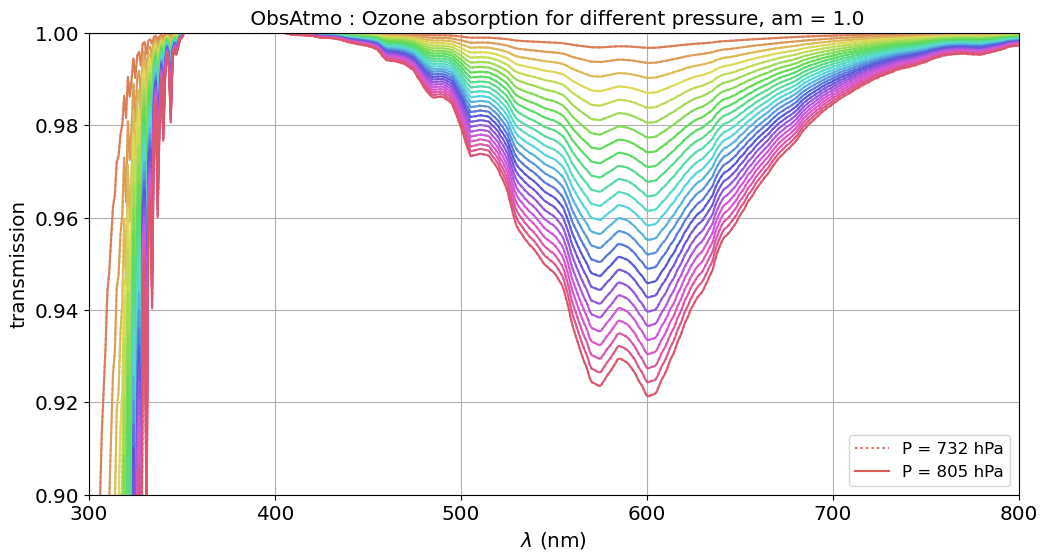

In [24]:
am =1

fig, ax = plt.subplots()
for idx,oz in enumerate(ozs):

    transm1 = emul1.GetOZabsTransparencyArray(WL,am,oz)
    transm2 = emul2.GetOZabsTransparencyArray(WL,am,oz)
    
    if idx == 0:
        ax.plot(WL,transm1,":",color=hls_colors[idx],label=label1)
        ax.plot(WL,transm2,"-",color=hls_colors[idx],label=label2)
    else:
        ax.plot(WL,transm1,":",color=hls_colors[idx])
        ax.plot(WL,transm2,"-",color=hls_colors[idx])
        

title = f" ObsAtmo : Ozone absorption for different pressure, am = {am:.1f}"
ax.set_title(title)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("transmission")
ax.set_xlim(300.,800.)
ax.set_ylim(0.9,1.0)
# place a text box in upper left in axes coords
#ax.text(0.5, 0.05, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)
ax.grid()
ax.legend()
plt.show()

## Check emulator with combined ascattering and absorption process and check with libradtran

In [25]:
am0 = 1.0
pwv0 = 5.0
oz0 = 500.
transm1 = emul1.GetGriddedTransparencies(WL,am0,pwv0,oz0,flagRayleigh=True)
transm2 = emul2.GetGriddedTransparencies(WL,am0,pwv0,oz0,flagRayleigh=True)

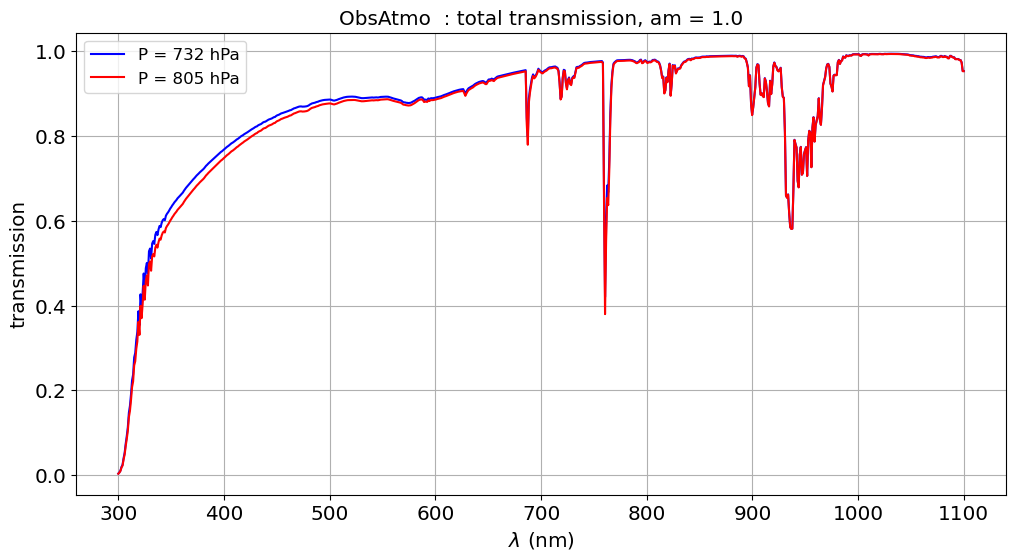

In [26]:
fig, ax = plt.subplots()

ax.plot(WL,transm1,'b-',label=label1)
ax.plot(WL,transm2,'r-',label=label2)

title = f"ObsAtmo  : total transmission, am = {am0:.1f}"
ax.set_title(title)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("transmission")
# place a text box in upper left in axes coords
#ax.text(0.5, 0.05, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)
ax.grid()
ax.legend()
plt.show()

### Zoom at O2 absorption lines

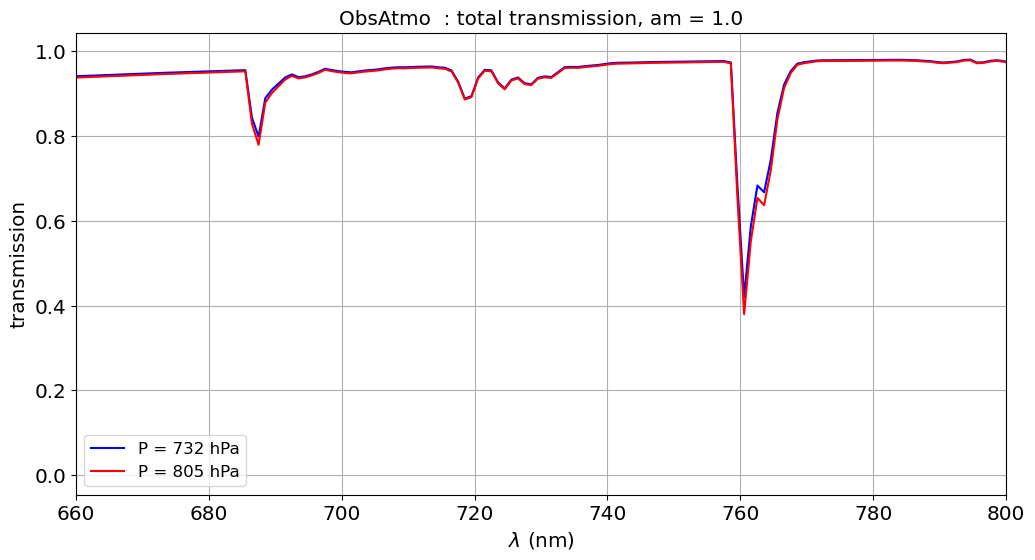

In [27]:
fig, ax = plt.subplots()

ax.plot(WL,transm1,'b-',label=label1)
ax.plot(WL,transm2,'r-',label=label2)

title = f"ObsAtmo  : total transmission, am = {am0:.1f}"
ax.set_title(title)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("transmission")
ax.set_xlim(660.,800.)
# place a text box in upper left in axes coords
#ax.text(0.5, 0.05, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)
ax.grid()
ax.legend()
plt.show()

## Check aerosols

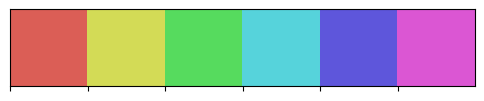

In [28]:
all_taus = np.arange(0,0.3,0.05)
NAER = len(all_taus) 
hls_colors = sns.color_palette("hls", NAER)
sns.palplot(hls_colors)

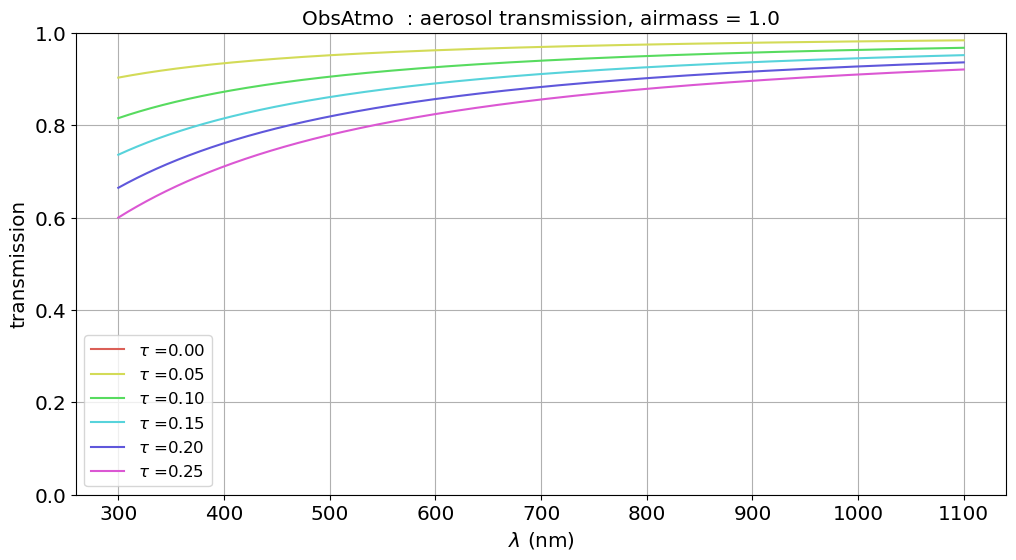

In [29]:
fig, ax = plt.subplots()
for index,tau in enumerate(all_taus):
    transm = emul1.GetAerosolsTransparencies(WL,am,tau) 
    label = r"$\tau$ =" + f"{tau:.2f}"
    ax.plot(WL,transm,color=hls_colors[index],label=label)
title = f"ObsAtmo  : aerosol transmission, airmass = {am:.1f}"
ax.set_title(title)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("transmission")
# place a text box in upper left in axes coords
#ax.text(0.5, 0.05, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)
ax.grid()
ax.legend()
ax.set_ylim(0,1)
plt.show()

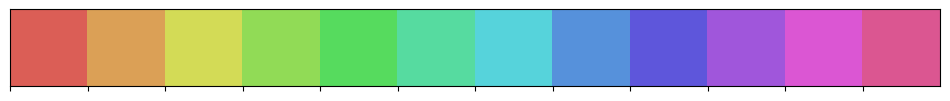

In [30]:
all_betas = np.arange(0.1,2.5,0.2)
NAER = len(all_betas) 
hls_colors = sns.color_palette("hls", NAER)
sns.palplot(hls_colors)
tau = 0.1

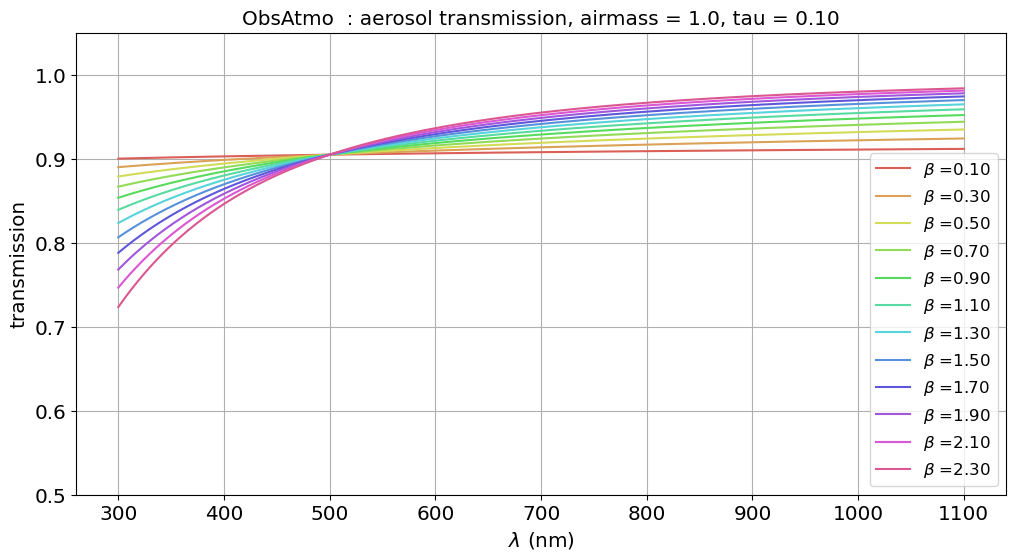

In [31]:
fig, ax = plt.subplots()
for index,beta in enumerate(all_betas):
    transm = emul1.GetAerosolsTransparencies(WL,am,tau,beta) 
    label = r"$\beta$ =" + f"{beta:.2f}"
    ax.plot(WL,transm,color=hls_colors[index],label=label)
title = f"ObsAtmo  : aerosol transmission, airmass = {am:.1f}, tau = {tau:.2f}"
ax.set_title(title)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("transmission")
# place a text box in upper left in axes coords
#ax.text(0.5, 0.05, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)
ax.grid()
ax.legend()
ax.set_ylim(0.5,1.05)
plt.show()

# The standard way to call atmospheric transmission

In [32]:
sorted_site_by_pressure = sorted(Dict_Of_sitesPressures.items(), key=lambda x:x[1])
sorted_site_by_pressure

[('OMK', 600.17224),
 ('PDM', 710.90637),
 ('LSST', 731.50433),
 ('CTIO', 774.6052),
 ('OHP', 937.22595),
 ('OSL', 1013.0)]

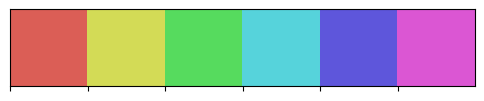

In [33]:
all_sites = sorted_site_by_pressure
NSites = len(all_sites)
hls_colors = sns.color_palette("hls", NSites)
sns.palplot(hls_colors)

OMK site name validated as OMK observatory
PDM site name validated as PDM observatory
LSST site name validated as LSST observatory
CTIO site name validated as CTIO observatory
OHP site name validated as OHP observatory
OSL site name validated as OSL observatory


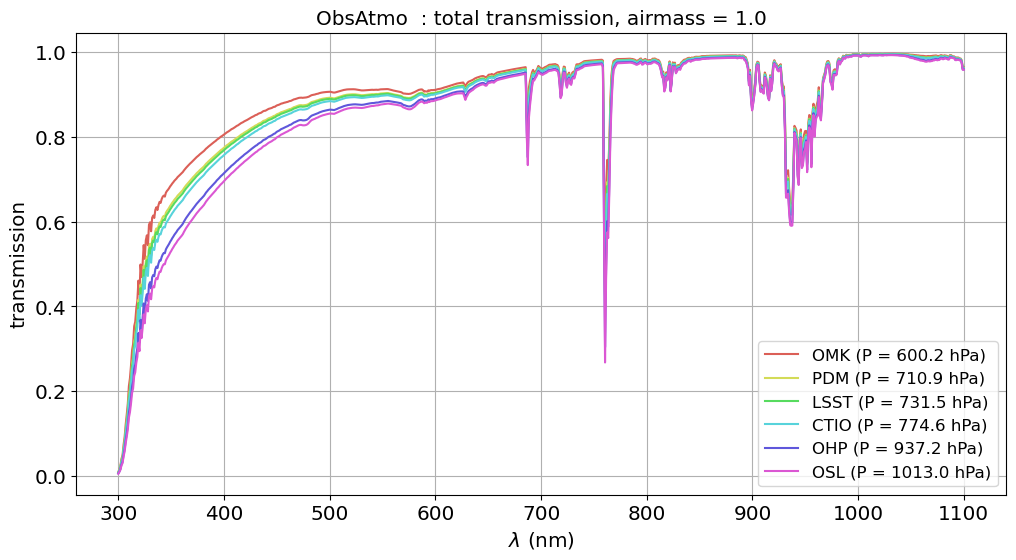

In [34]:
am=1
pwv = 4.0
oz= 400.
tau = 0.
beta = 3

fig, ax = plt.subplots()

for idx,site in enumerate(all_sites):

    obs_str = site[0]
    ref_press = site[1]
    
    emul = ObsAtmo(obs_str)
    pressure= emul.pressure
    
    label= f"{obs_str} (P = {pressure:.1f} hPa)"
    
    transm = emul.GetAllTransparencies(WL,am,pwv,oz,tau,beta)
    ax.plot(WL,transm,'-',color=hls_colors[idx],label=label)

title = f"ObsAtmo  : total transmission, airmass = {am:.1f}"
ax.set_title(title)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("transmission")
# place a text box in upper left in axes coords
#ax.text(0.5, 0.05, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)
ax.grid()
ax.legend()
plt.show()

OMK site name validated as OMK observatory
PDM site name validated as PDM observatory
LSST site name validated as LSST observatory
CTIO site name validated as CTIO observatory
OHP site name validated as OHP observatory
OSL site name validated as OSL observatory


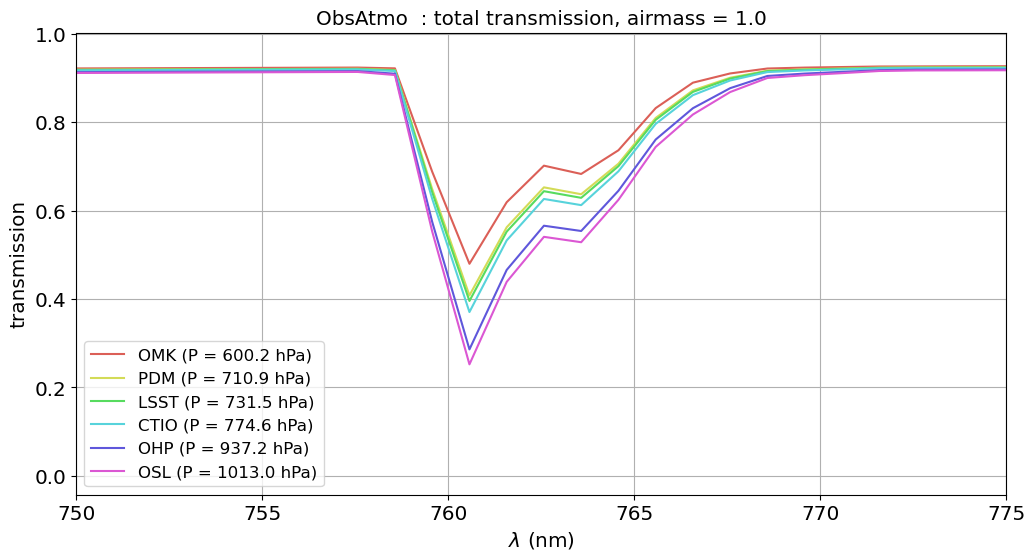

In [35]:
am=1
pwv = 4.0
oz= 400.
tau = 0.1
beta = 1.2

fig, ax = plt.subplots()

for idx,site in enumerate(all_sites):

    obs_str = site[0]
    ref_press = site[1]
    
    emul = ObsAtmo(obs_str)
    pressure= emul.pressure
    
    label= f"{obs_str} (P = {pressure:.1f} hPa)"
    
    transm = emul.GetAllTransparencies(WL,am,pwv,oz,tau,beta)
    ax.plot(WL,transm,'-',color=hls_colors[idx],label=label)

title = f"ObsAtmo  : total transmission, airmass = {am:.1f}"
ax.set_title(title)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("transmission")
ax.set_xlim(750.,775.)
# place a text box in upper left in axes coords
#ax.text(0.5, 0.05, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)
ax.grid()
ax.legend()
plt.show()